# Customer Segmentation Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv("C:\\Users\\ADMIN\\OneDrive\\Documents\\Hands on Projcts for DS/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Cleaning

In [29]:
df.rename(columns={'Genre':'Gender'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
df.shape

(200, 5)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [32]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [33]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
df.drop('CustomerID',axis=True,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Analysis

In [38]:
import warnings
warnings.filterwarnings('ignore')

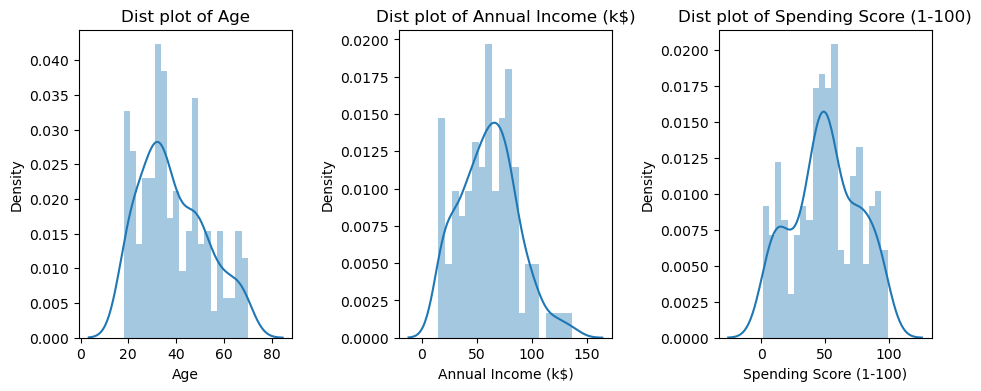

In [45]:
plt.figure(1,figsize=(11,4))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Dist plot of {}'.format(x))
plt.show()

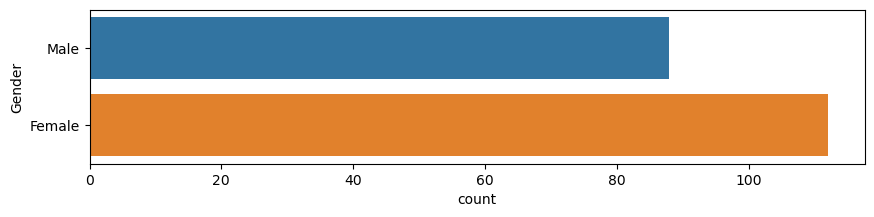

In [48]:
plt.figure(figsize=(10,2))
sns.countplot(y='Gender',data=df)
plt.show()

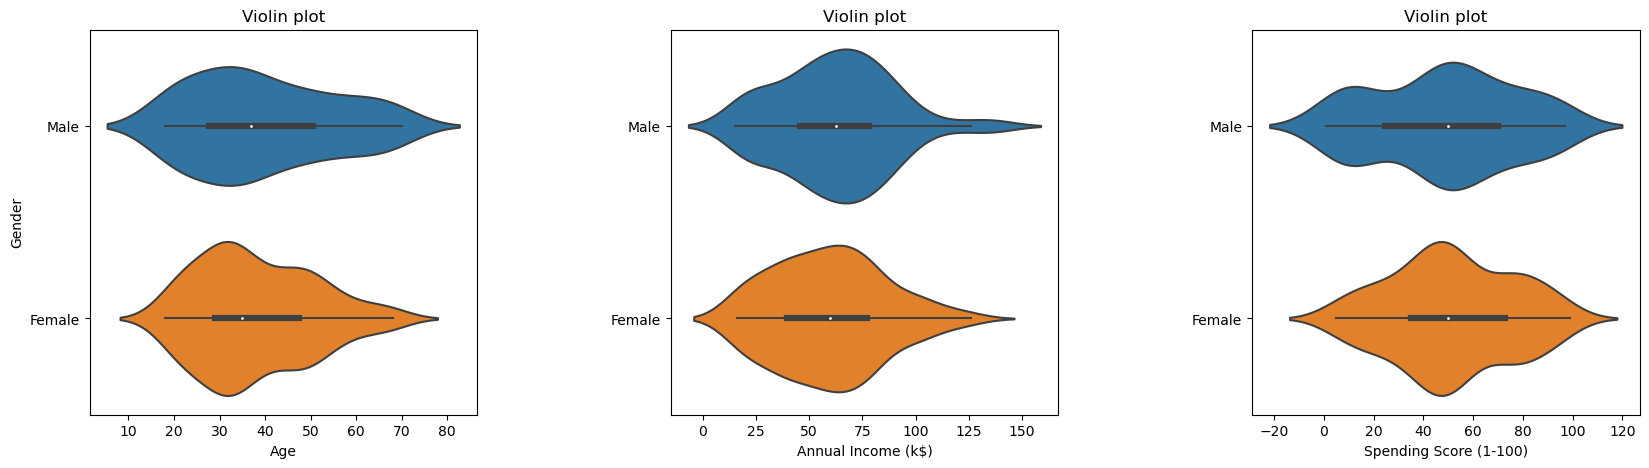

In [57]:
plt.figure(1,figsize=(20,5))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Gender',data=df)
    plt.ylabel("Gender" if n==1 else '')
    plt.title("Violin plot")
plt.show()

In [76]:
df_18_25=df.Age[(df.Age >= 18) & (df.Age <= 25)]
df_26_35=df.Age[(df.Age >= 26) & (df.Age <= 35)]
df_36_45=df.Age[(df.Age >= 36) & (df.Age <= 45)]
df_46_55=df.Age[(df.Age >= 46) & (df.Age <= 55)]
df_56_65=df.Age[(df.Age >= 56) & (df.Age <= 65)]
df_66_above=df.Age[(df.Age >= 66)]

agex=['18-25','26-35','36-45','46-55','56-65','66+']
agey=[len(df_18_25.values),len(df_26_35.values),len(df_36_45.values),len(df_46_55.values),len(df_56_65.values),
      len(df_66_above.values)]

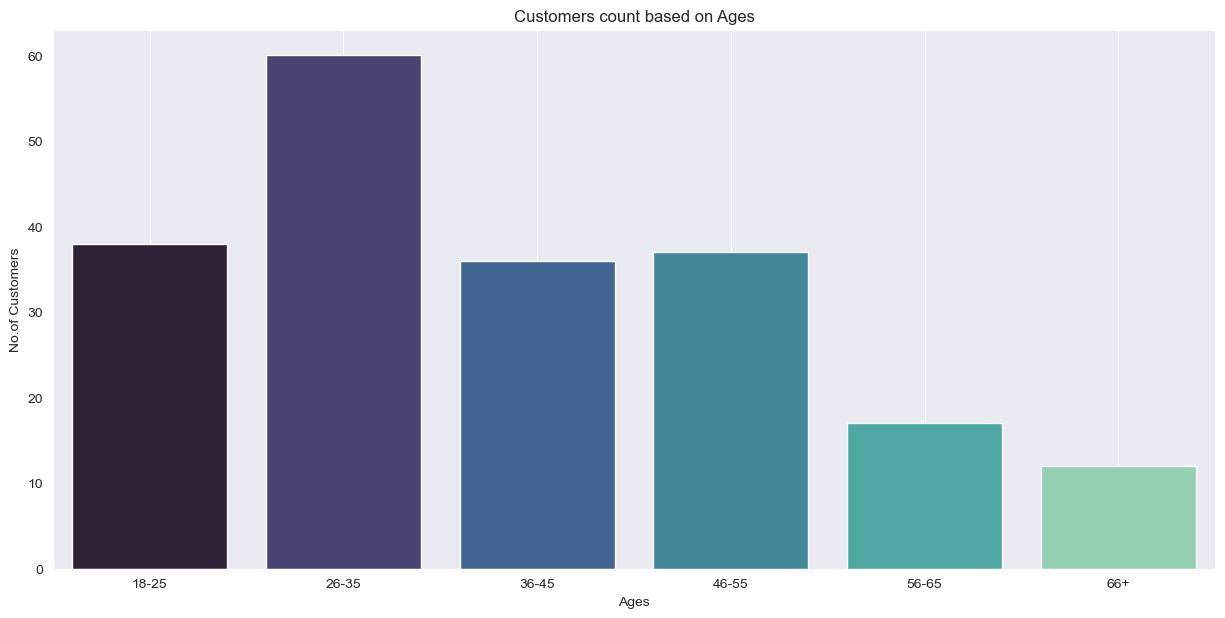

In [78]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Customers count based on Ages')
plt.xlabel('Ages')
plt.ylabel('No.of Customers')
plt.grid()
plt.show()

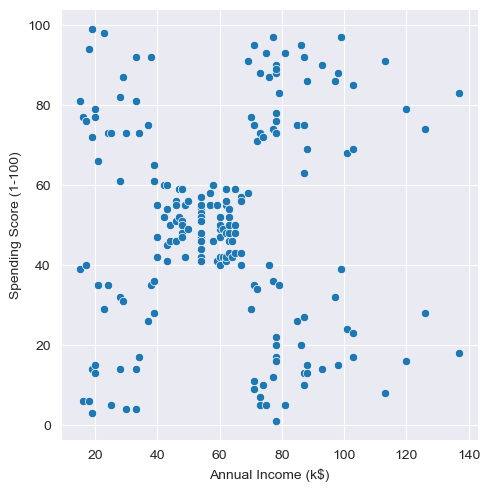

In [85]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

In [88]:
ss_1_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1)&(df['Spending Score (1-100)']<=20)]
ss_21_40=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21)&(df['Spending Score (1-100)']<=40)]
ss_41_60=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=31)&(df['Spending Score (1-100)']<=60)]
ss_61_80=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41)&(df['Spending Score (1-100)']<=80)]
ss_81_100=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=51)&(df['Spending Score (1-100)']<=100)]

Spending_Score_x=['1-20','21-40','41-60','61-80','81-100']
Spending_Score_y=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

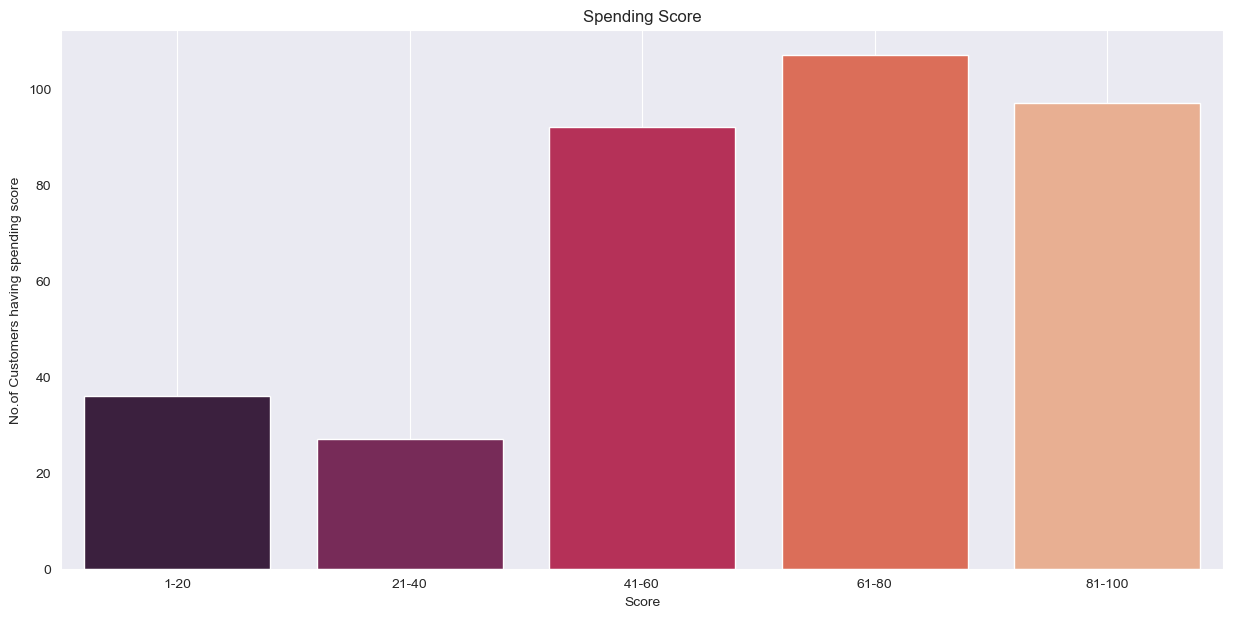

In [89]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x=Spending_Score_x,y=Spending_Score_y,palette='rocket')
plt.title('Spending Score')
plt.xlabel('Score')
plt.ylabel('No.of Customers having spending score')
plt.grid()
plt.show()

In [100]:
ai_0_30=df['Annual Income (k$)'][(df['Annual Income (k$)']>=0)&(df['Annual Income (k$)']<=30)]
ai_31_60=df['Annual Income (k$)'][(df['Annual Income (k$)']>=31)&(df['Annual Income (k$)']<=60)]
ai_61_90=df['Annual Income (k$)'][(df['Annual Income (k$)']>=61)&(df['Annual Income (k$)']<=90)]
ai_91_120=df['Annual Income (k$)'][(df['Annual Income (k$)']>=91)&(df['Annual Income (k$)']<=120)]
ai_121_150=df['Annual Income (k$)'][(df['Annual Income (k$)']>=121)&(df['Annual Income (k$)']<=150)]

aix=['0-30','31-60','61-90','91-120','121-150']
aiy=[len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

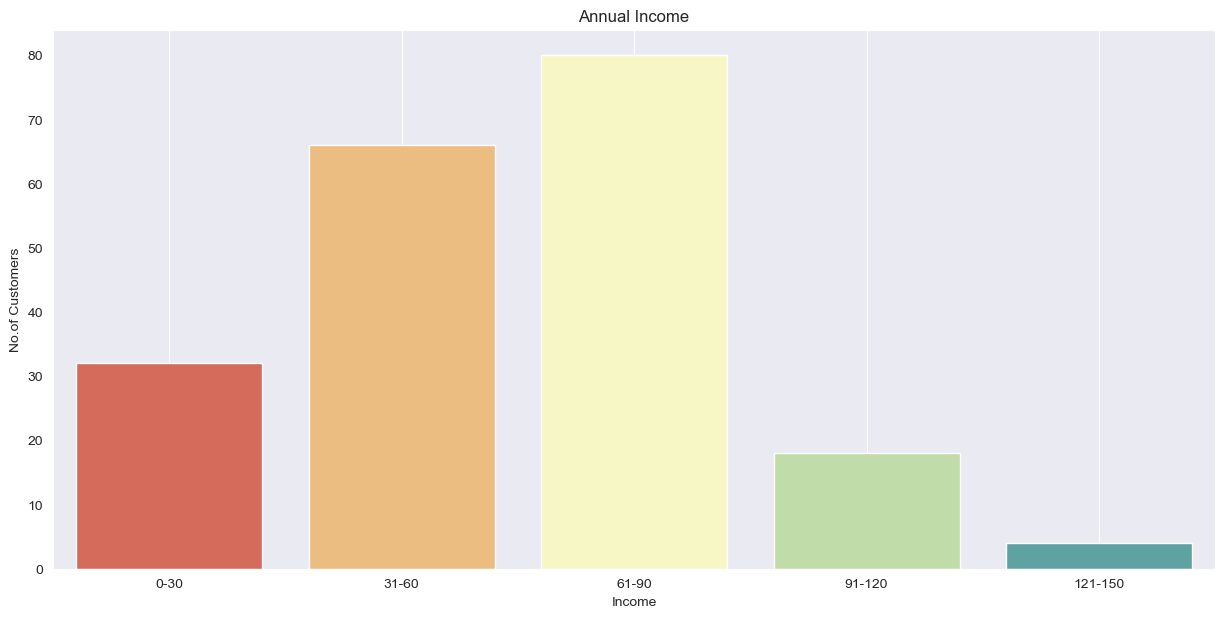

In [101]:
plt.figure(figsize=(15,7))
sns.barplot(x=aix,y=aiy,palette='Spectral')
plt.title('Annual Income')
plt.xlabel('Income')
plt.ylabel('No.of Customers')
plt.grid()
plt.show()

# Using KMeans Clustering for further process

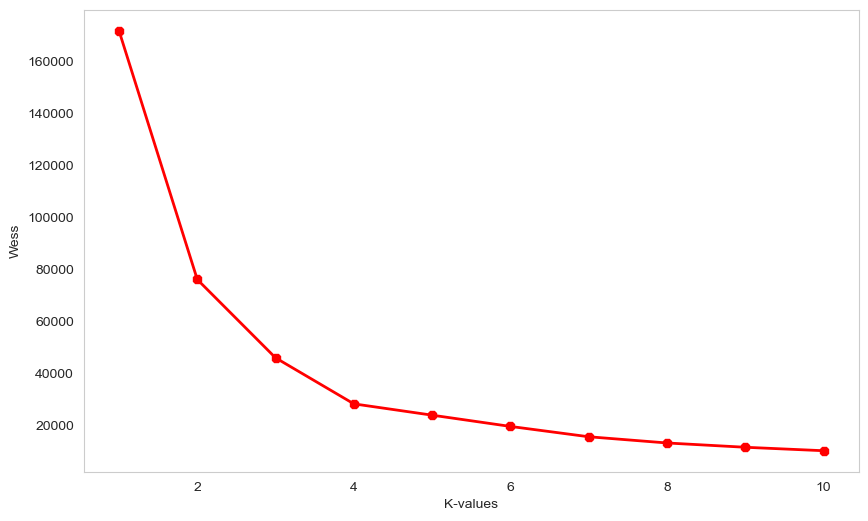

In [105]:
X1=df.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wess=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X1)
    wess.append(kmeans.inertia_)
sns.set_style('whitegrid')    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wess,linewidth=2,color='red',marker="8")
plt.xlabel('K-values')
plt.ylabel('Wess')
plt.grid()
plt.show()

In [117]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
label

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [118]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


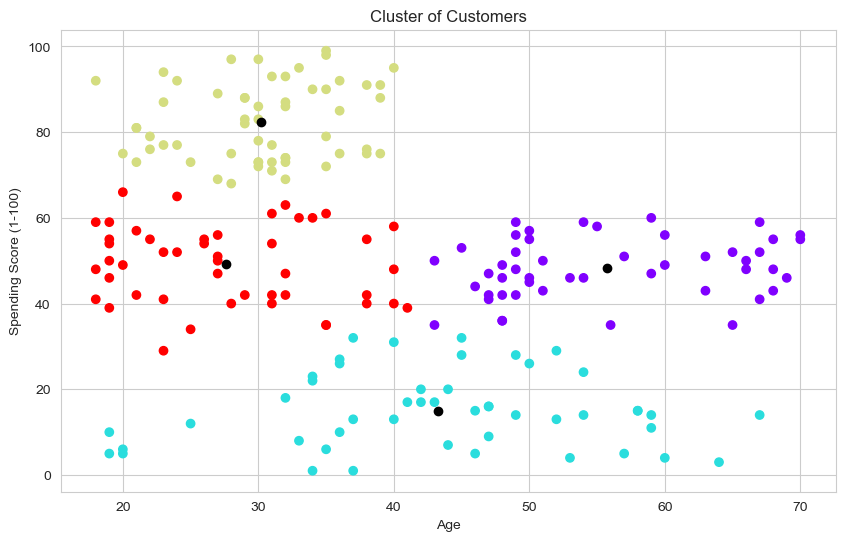

In [121]:
plt.figure(figsize=(10,6))
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title("Cluster of Customers")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

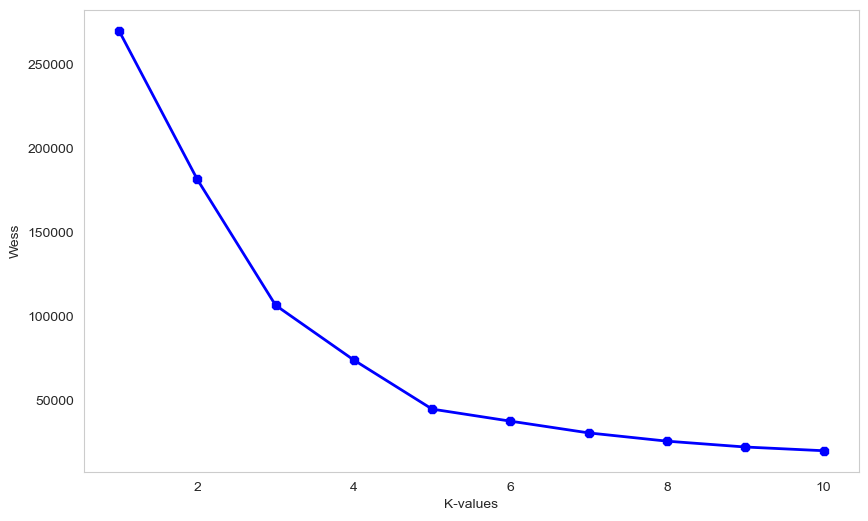

In [124]:
X2=df.loc[:,['Spending Score (1-100)','Annual Income (k$)']].values
wess=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X2)
    wess.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wess,linewidth=2,color="blue",marker="8")
plt.xlabel("K-values")
plt.ylabel('Wess')
plt.grid()
plt.show()
    

In [126]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [127]:
print(kmeans.cluster_centers_)

[[49.51851852 55.2962963 ]
 [82.12820513 86.53846154]
 [17.11428571 88.2       ]
 [79.36363636 25.72727273]
 [20.91304348 26.30434783]]


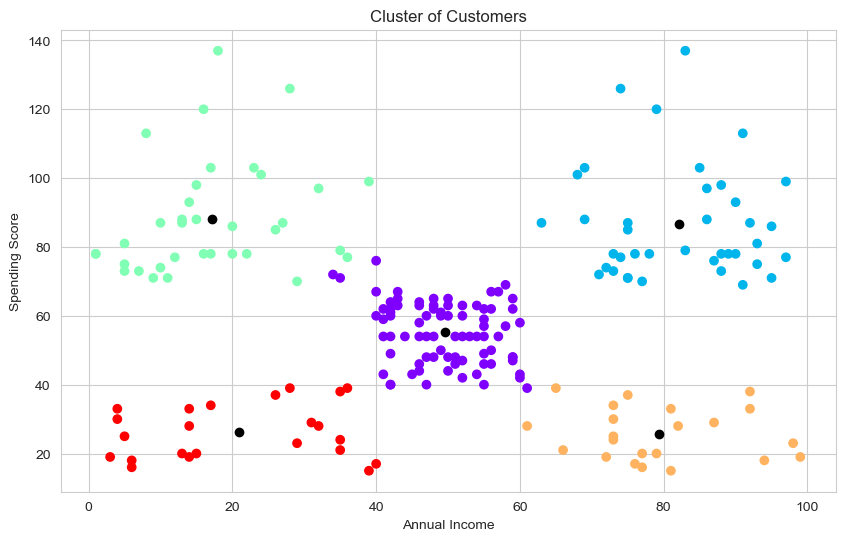

In [130]:
plt.figure(figsize=(10,6))
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Cluster of Customers')
plt.show()

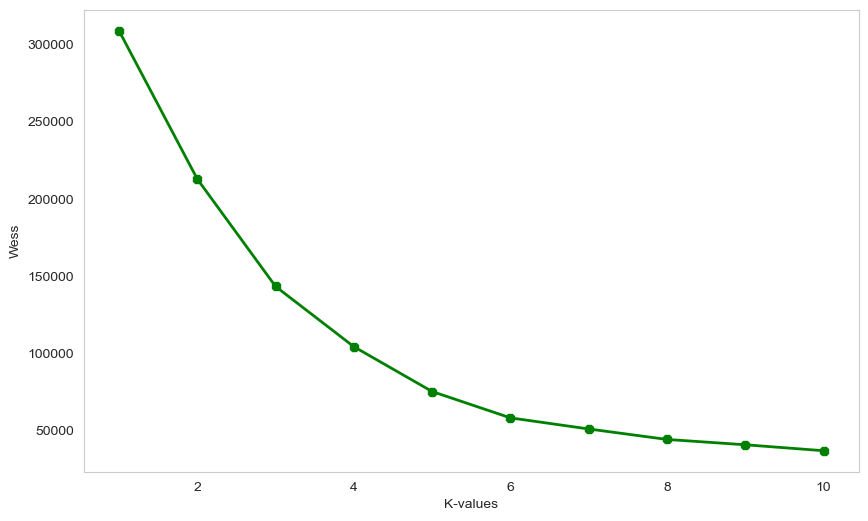

In [134]:
X3=df.iloc[:,1:].values
wess=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X3)
    wess.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wess,linewidth=2,color="green",marker="8")
plt.xlabel("K-values")
plt.ylabel('Wess')
plt.grid()
plt.show()

In [135]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X3)
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [136]:
print(kmeans.cluster_centers_)

[[42.9375     55.0875     49.7125    ]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [25.27272727 25.72727273 79.36363636]
 [45.2173913  26.30434783 20.91304348]]


In [141]:
clusters=kmeans.fit_predict(X3)
df['Label']=clusters
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


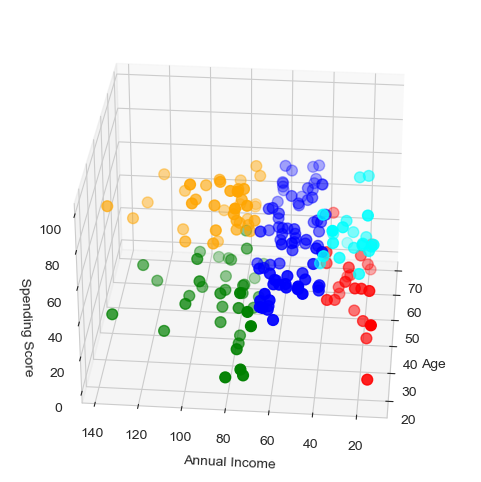

In [145]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(df.Age[df.Label==0],df["Annual Income (k$)"][df.Label==0],df["Spending Score (1-100)"][df.Label==0],color='blue',s=60)
ax.scatter(df.Age[df.Label==1],df["Annual Income (k$)"][df.Label==1],df["Spending Score (1-100)"][df.Label==1],color='green',s=60)
ax.scatter(df.Age[df.Label==2],df["Annual Income (k$)"][df.Label==2],df["Spending Score (1-100)"][df.Label==2],color='red',s=60)
ax.scatter(df.Age[df.Label==3],df["Annual Income (k$)"][df.Label==3],df["Spending Score (1-100)"][df.Label==3],color='orange',s=60)
ax.scatter(df.Age[df.Label==4],df["Annual Income (k$)"][df.Label==4],df["Spending Score (1-100)"][df.Label==4],color='cyan',s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()